           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float6

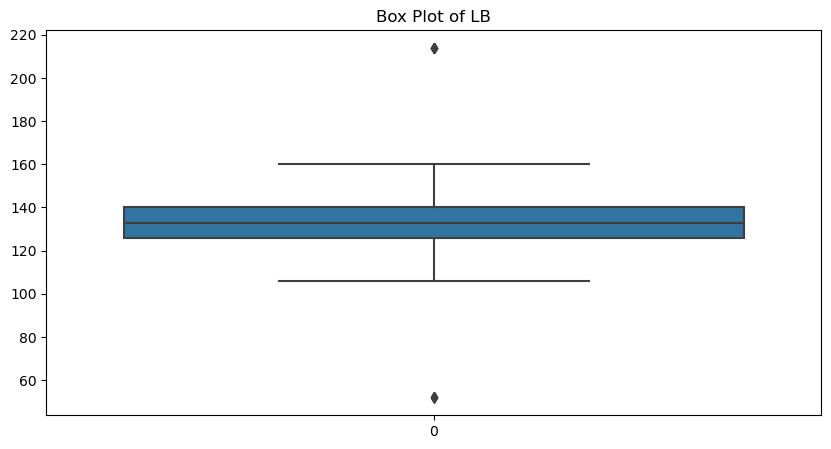

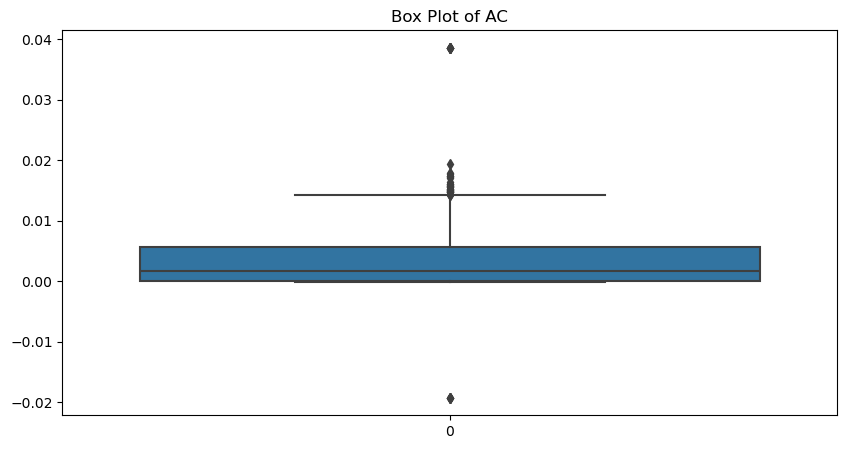

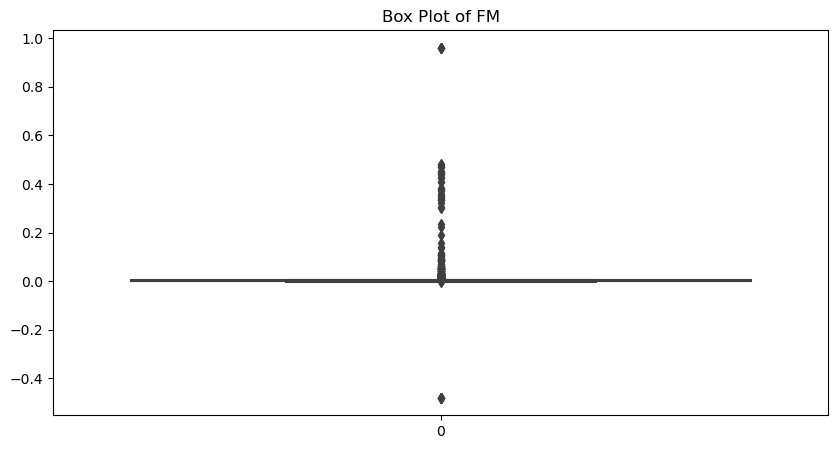

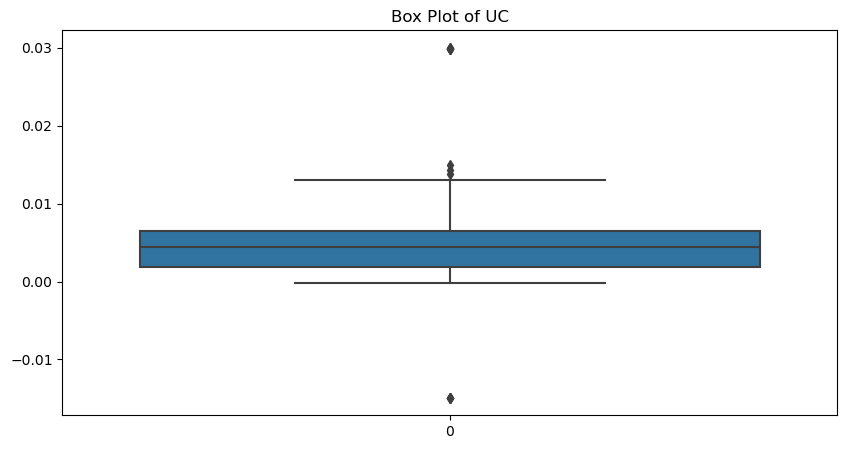

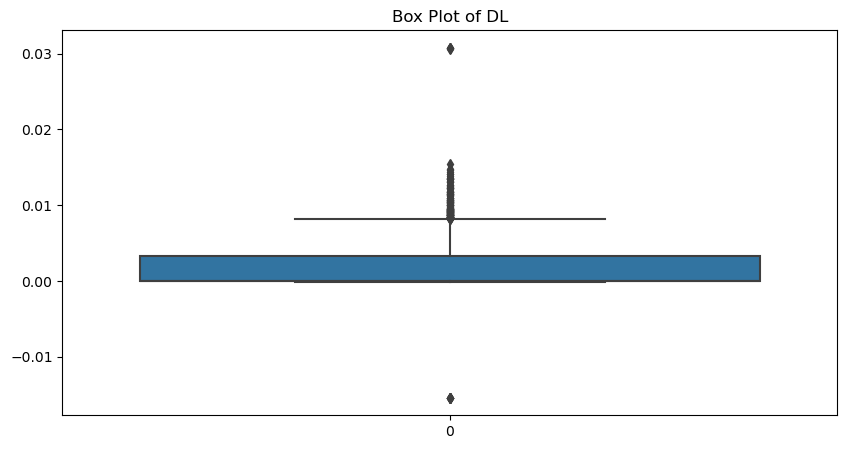

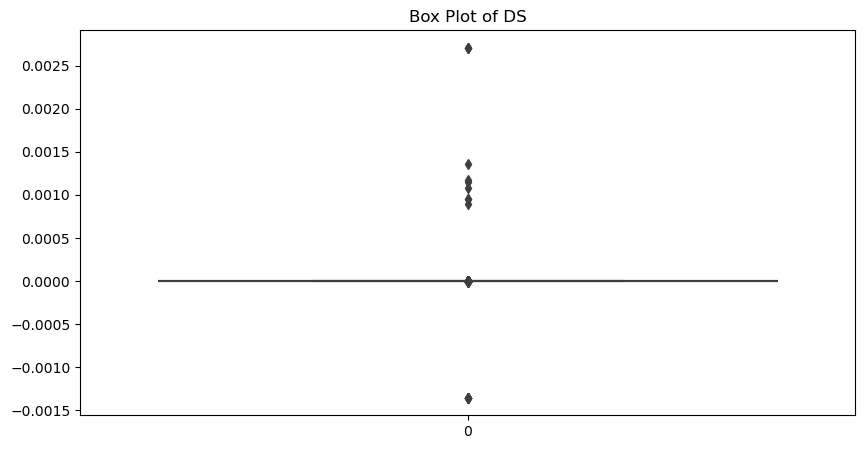

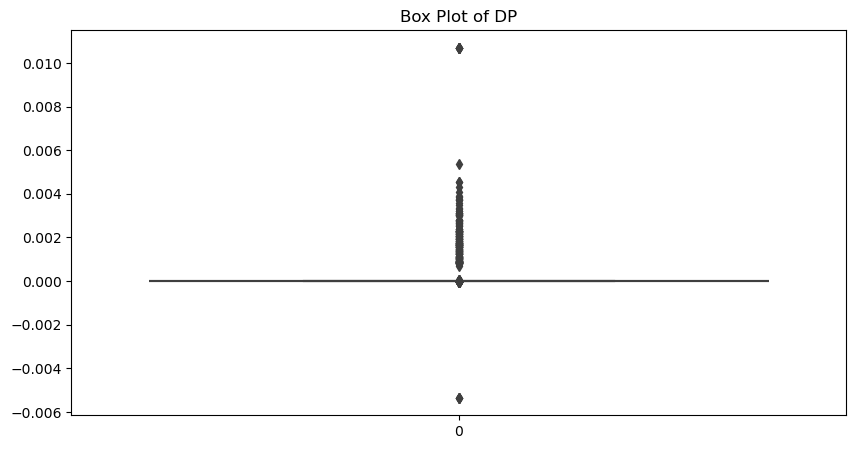

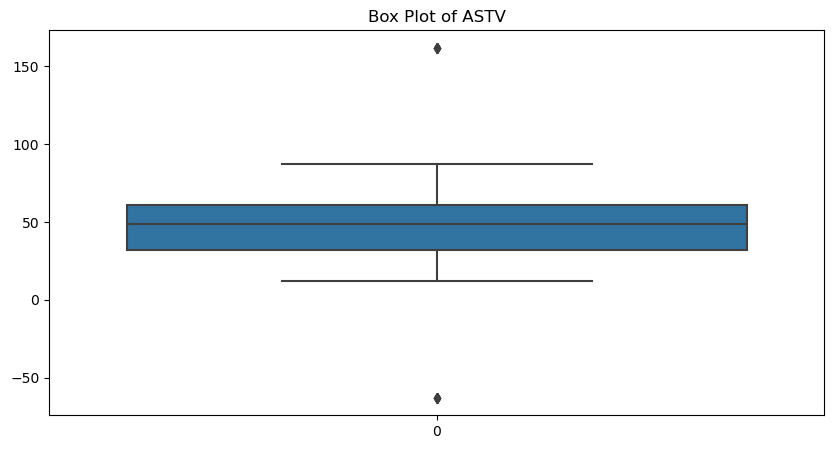

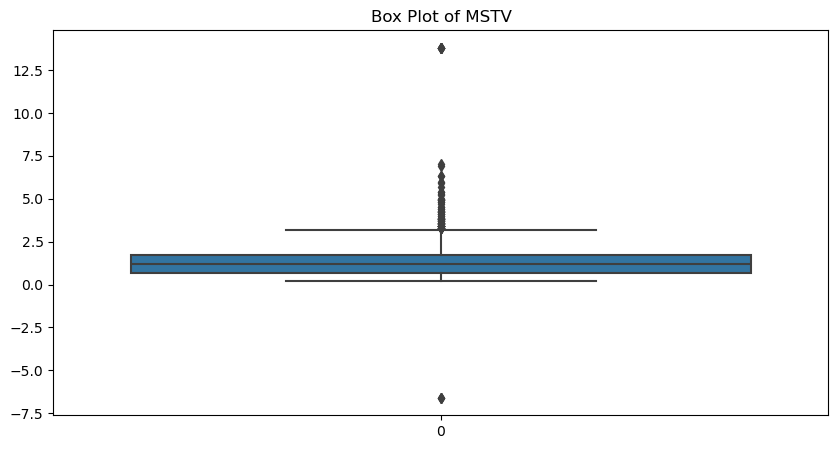

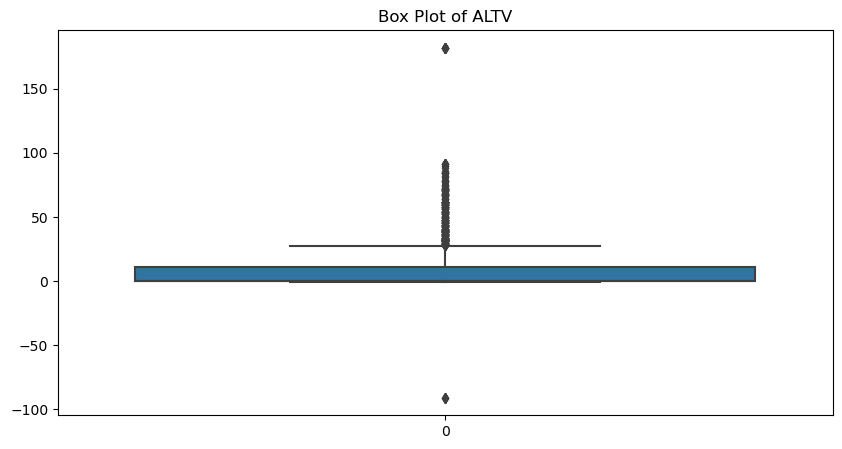

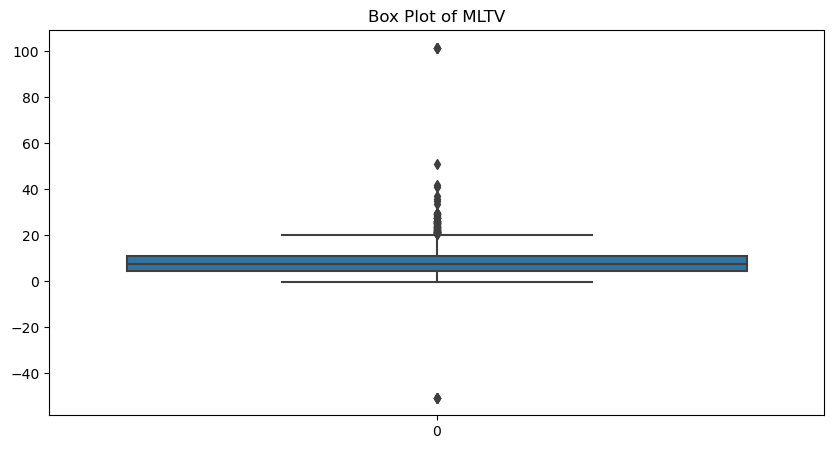

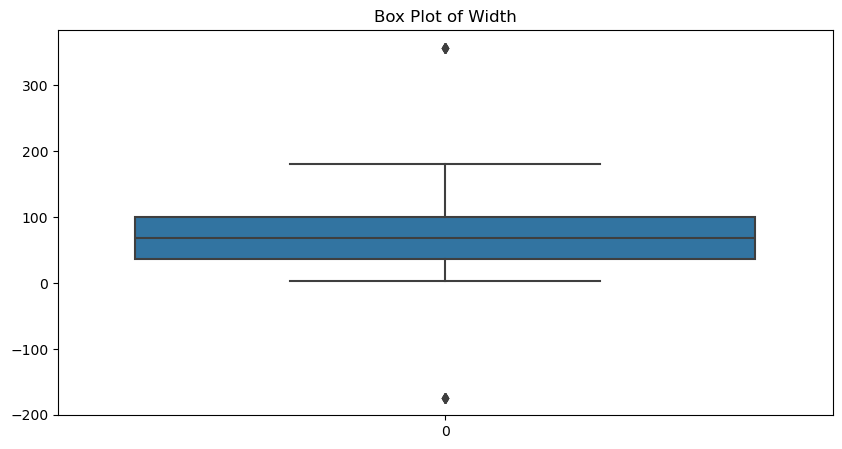

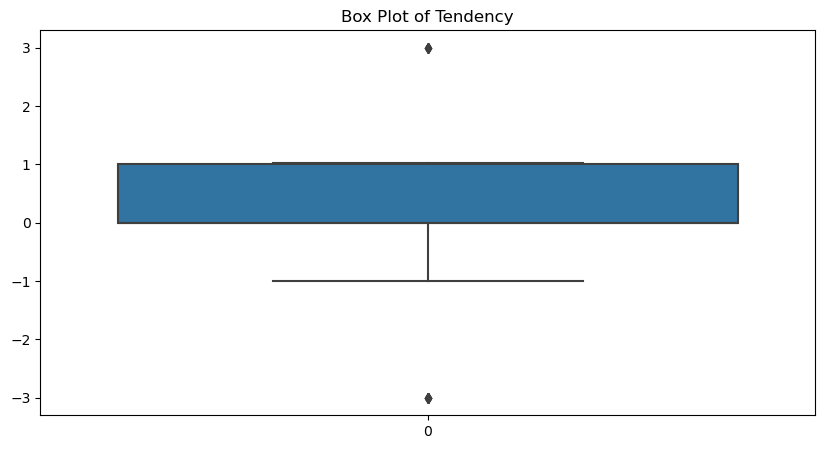

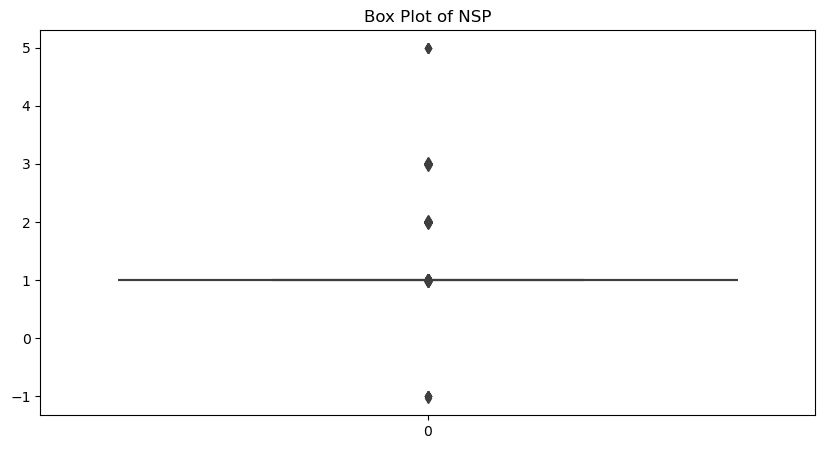

In [1]:
#1.Data Cleaning and Preparation:


import pandas as pd

# Load the dataset
df = pd.read_csv((r"C:\Users\sathv\Downloads\EDA1\EDA1\Cardiotocographic.csv"))

# Display the first few rows to understand the structure
print(df.head())
# Check for missing values
print(df.isnull().sum())
# Fill missing values for numerical columns with the mean
df.fillna(df.mean(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Remove rows with any missing values
df.dropna(inplace=True)

# Alternatively, remove columns with a high percentage of missing values
threshold = 0.5  # 50% threshold
df.dropna(axis=1, thresh=int(threshold * len(df)), inplace=True)
# Check data types
print(df.dtypes)

# Convert data types if necessary
# For instance, convert columns to numeric if they're mistakenly stored as strings
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')
df['AC'] = pd.to_numeric(df['AC'], errors='coerce')
# Repeat for other relevant columns
from scipy import stats

# Compute Z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)

# Define a threshold
threshold = 3
outliers = (abs_z_scores > threshold).all(axis=1)

# Print the number of outliers
print(f"Number of outliers: {outliers.sum()}")
import seaborn as sns
import matplotlib.pyplot as plt

# Generate box plots for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
# Cap values to a certain percentile range (e.g., 1st and 99th percentiles)
lower_bound = df['LB'].quantile(0.01)
upper_bound = df['LB'].quantile(0.99)
df['LB'] = df['LB'].clip(lower=lower_bound, upper=upper_bound)
# Remove outliers based on a threshold for Z-scores
df = df[~outliers]

In [1]:
#2.Statistical Summary:



import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sathv\Downloads\EDA1\EDA1\Cardiotocographic.csv")

# Display the first few rows of the dataset
print(df.head())
import numpy as np

# Function to calculate IQR
def calculate_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q3 - Q1

# Summary statistics for each variable
summary_stats = df.describe(include='all').transpose()

# Add median and IQR to the summary statistics
summary_stats['median'] = df.median()
summary_stats['IQR'] = df.apply(calculate_iqr)

print(summary_stats)


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
           count        mean        std         min         25%         50%  \
LB        2124.0  133.356183  11.260563   51.842487  126.000000  133.000000   
AC        2124.0    0.003235   0.004397   -0.019284    0.000000    0.001658   
FM        2124.0    0.009904   0.067571   -0.480634    0.000000    0.000000   
UC        2

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


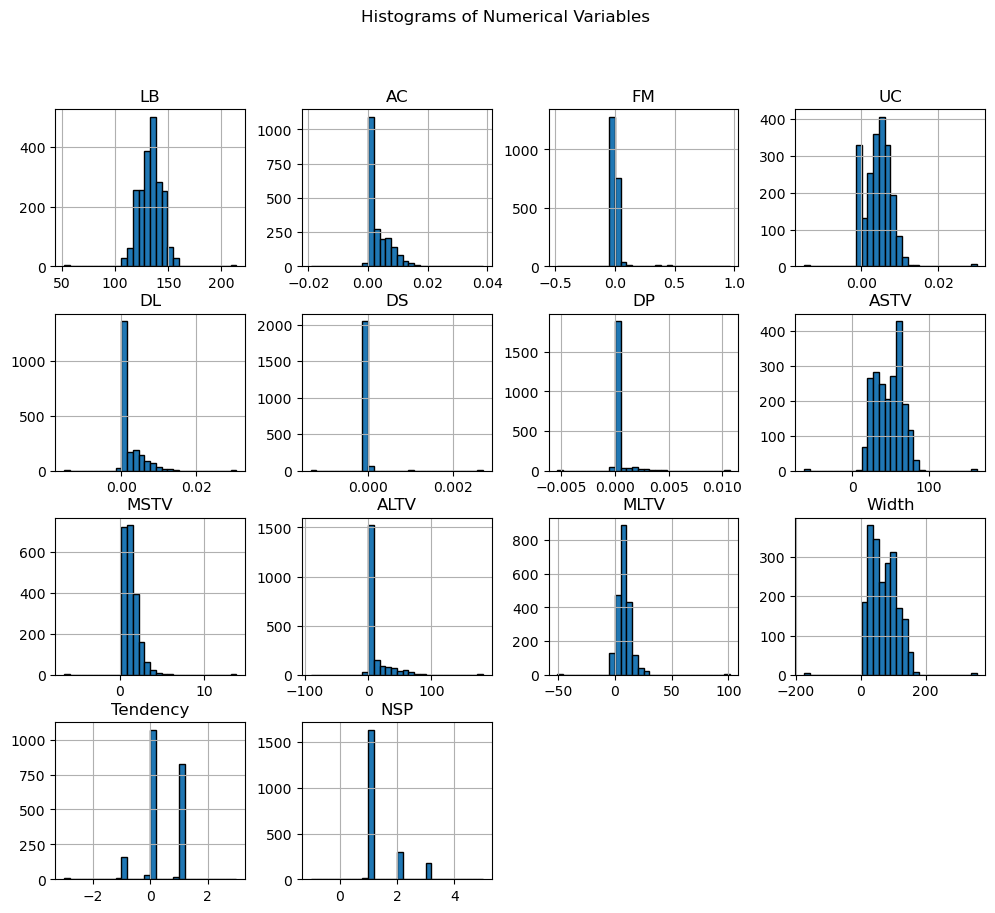

ValueError: num must be an integer with 1 <= num <= 8, not 9

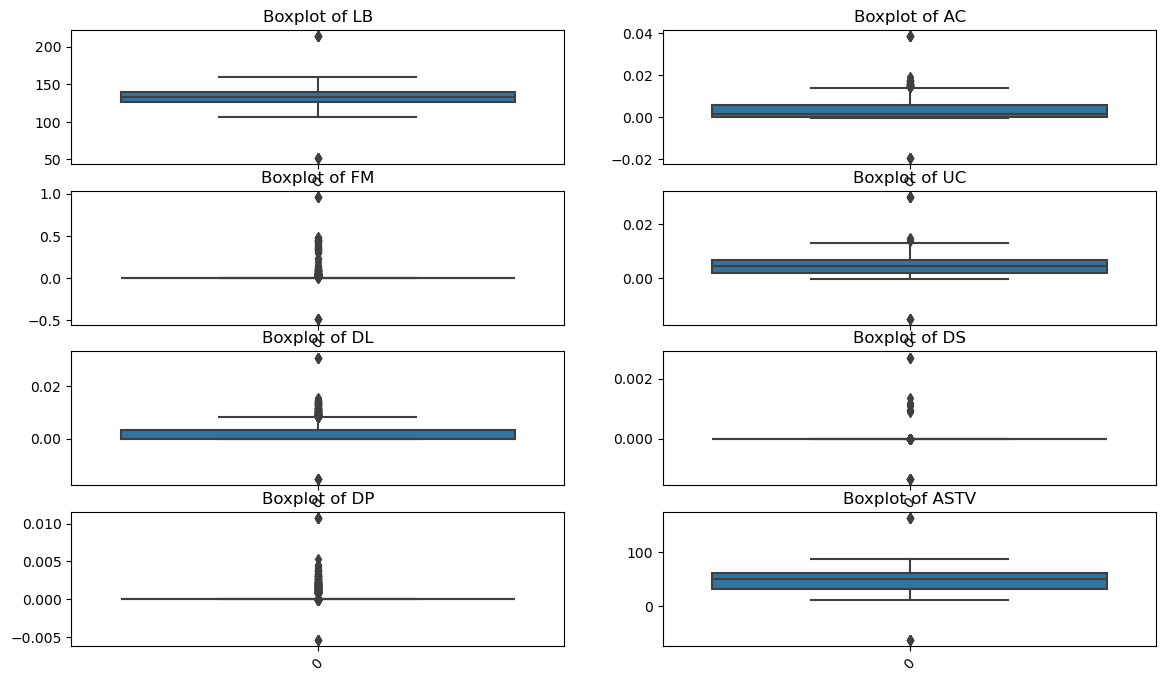

In [4]:
#3.Data Visualization:

import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sathv\Downloads\EDA1\EDA1\Cardiotocographic.csv")

# Display the first few rows to understand the structure
print(df.head())
import matplotlib.pyplot as plt

# Plot histograms for numerical variables
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()
import seaborn as sns

# Plot boxplots for numerical variables
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 3, i + 1)  # Adjust the number of rows/columns as needed
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Plot bar charts for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.show()
# Plot pie charts for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.show()
# Plot scatter plots for pairs of numerical variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# Plot violin plots for numerical variables
plt.figure(figsize=(14, 8))
for i, column in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.violinplot(y=df[column])
    plt.title(f'Violin Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Generate a heatmap of pairwise relationships using Seaborn's pairplot
sns.pairplot(df[num_cols], kind='reg', plot_kws={'scatter_kws': {'s': 10}})
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()


                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063177  0.018338 -0.164170 -0.129587 -0.008822   
AC       -0.063177  1.000000  0.008796  0.070269 -0.093434 -0.035005   
FM        0.018338  0.008796  1.000000 -0.053386  0.009641  0.029190   
UC       -0.164170  0.070269 -0.053386  1.000000  0.189737 -0.008112   
DL       -0.129587 -0.093434  0.009641  0.189737  1.000000  0.066637   
DS       -0.008822 -0.035005  0.029190 -0.008112  0.066637  1.000000   
DP       -0.040191 -0.074055  0.116297  0.061795  0.138527  0.003288   
ASTV      0.242363 -0.230574 -0.032838 -0.182379 -0.069907  0.011659   
MSTV     -0.171986  0.134220  0.017061  0.189685  0.410216  0.017825   
ALTV      0.210636 -0.271731 -0.012005 -0.227881 -0.187275 -0.005820   
MLTV     -0.003671 -0.108096 -0.006197 -0.049421 -0.165554  0.033132   
Width    -0.118984  0.241301  0.096252  0.106007  0.409473  0.042625   
Tendency  0.237599  0.028720 -0.018269 -0.064915 -0.027217 -0.02

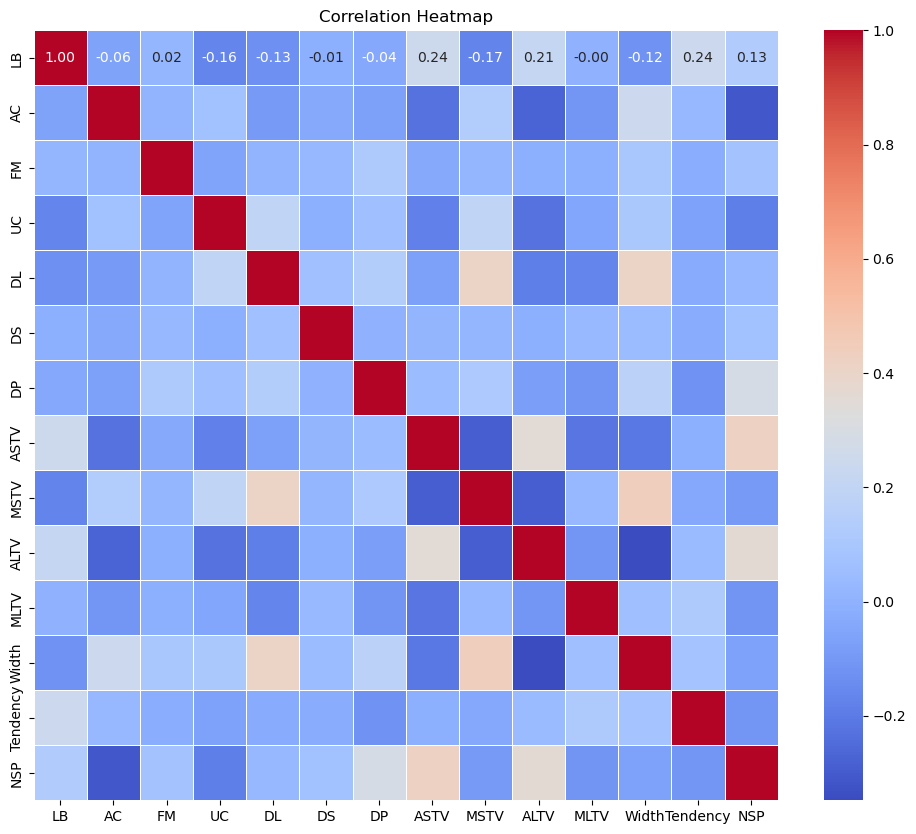

KeyError: 'time'

In [3]:
#4.Pattern Recognition and Insights:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\sathv\Downloads\EDA1\EDA1\Cardiotocographic.csv")

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# Convert timestamp to datetime if necessary
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Resample data to a suitable frequency (e.g., daily, weekly)
# Here, we're resampling to daily frequency
resampled_data = df.resample('D').mean()

# Plot the trends over time for key variables
plt.figure(figsize=(14, 8))
for column in ['LB', 'AC', 'FM', 'UC']:  # Include other key columns as needed
    plt.plot(resampled_data.index, resampled_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.show()
# Example: Group by `UC` (Uterine Contractions) and calculate means of other variables
grouped_data = df.groupby('UC').mean()

# Plot the means of key variables
plt.figure(figsize=(14, 8))
for column in ['LB', 'AC', 'FM', 'DL']:  # Include other key columns as needed
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.xlabel('Uterine Contractions')
plt.ylabel('Mean Value')
plt.title('Patterns by Uterine Contractions')
plt.legend()
plt.show()
